In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('./data/train.csv')
train.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [3]:
EDA_df = train.drop(['주간통화시간'], axis=1)

In [4]:
EDA_df

,ID,가입일,음성사서함이용,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [5]:
import random
import os
import numpy as np

#sklearn module & utils
from tqdm.notebook import tqdm
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import StratifiedKFold , KFold, train_test_split, cross_val_score, cross_validate
from sklearn.feature_selection import SelectPercentile
warnings.filterwarnings('ignore') 

#Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Modeling
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [6]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [7]:
x_train = train.drop(['ID', '전화해지여부'], axis=1)
y_train = train['전화해지여부']

test = pd.read_csv('./data/test.csv')
test = test.drop('ID', axis=1)

In [8]:
model=[
    ('bag', BaggingClassifier(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=62)),
    ('xgb', XGBClassifier(random_state=52)),
    ('lgb', LGBMClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

In [9]:
best_model = VotingClassifier(model, voting='hard', weights=[1,1,2,1,2])
best_model.fit(x_train,y_train)

VotingClassifier(estimators=[('bag', BaggingClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=62)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_po...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                         

In [10]:
pred = best_model.predict(test)

In [11]:
submit = pd.read_csv('./data/sample_submission.csv')

In [12]:
submit['전화해지여부'] = pred
submit.head()

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [13]:
submit.to_csv('./result/EDA_re(4).csv', index=False)

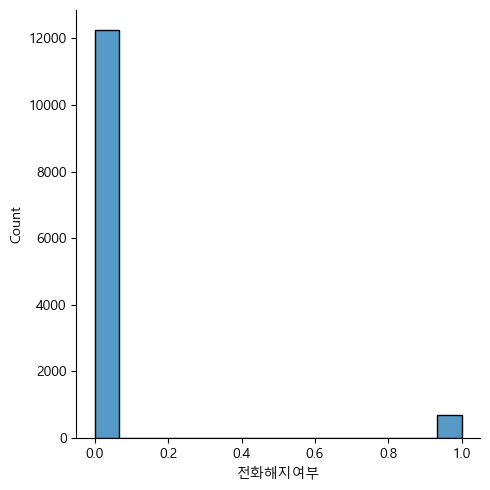

In [14]:
plt.rc('font', family='Malgun Gothic')
sns.displot(x = submit['전화해지여부'])
plt.show()